W ramach kursu będziemy wykorzystywać głównie bibliotekę OpenCV (Open Computer Vision Library).
W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi funkcjonalnościami: wczytaniami, zapisywaniem, konwersją do inne przestrzeni barw.
Zaznajomimy się również z Jupyter Notebook.

Wczytywanie obrazów z wykorzystaniem OpenCV.
1. Zaimportuj bibliotekę OpenCV:
        `import cv2`
1. Zaimportuj bibliotekę pyplot z matplotlib jako plt:
        `from matplotlib import pyplot as plt`
1. Wygodną opcją jest możliwość pobierania danych (obrazów, ale też np. baz danych) z sieci.
   Eliminuje to konieczność pobierania danych np. z Moodle oraz czyni uzupełniony Notebook "samowystarczalnym" - wystarczy go uruchomić.
   * zaimportuj bibliotekę `import os`
   * sprawdź, czy taki plik istnieje (unikniemy wielokrotnego pobierania tych samych danych)
        `if not os.path.exists("mandril.jpg") :`
   * pobierz obraz: `!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/01_Intro/mandril.jpg`

1. Wykorzystując polecenie *imread* wczytaj obraz *mandril.jpg*
1. Wyświetl obraz wykorzystując bibliotekę *pyplot*
        plt.imshow(I)
        plt.xticks([]), plt.yticks([])
        plt.show()
1. Jeśli ktoś nie wie jak powinien wyglądać mandryl, to proszę podglądnąć obraz na GitHub lub w sprawdzić w Interencie.
   Przyczyną problemu jest sposób w jaki funkcja `imread` z OpenCV odczytuje obraz (BGR, zamiast RGB).
   Obrazom kolorowym będzie poświęcone odrębne ćwiczenie, także nie będziemy w tym miejscu rozwijać tego wątku.
1. W celu poprawnego wyświetlenia należy dokonać konwersji koloru z BGR na RGB.
        I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
1. Dla porządku warto dodać, że w OpenCV do wyświetlania domyślnie wykorzystuje się funkcję `imshow`.
   Jednakże w przypadku Jupyter Notebook to rozwiązanie ma pewne wady i dlatego nie będziemy jej używać.
   Natomiast jeśli ktoś pracuje w "czystym" Python, to jest to na pewno równoważna funkcjonalność.


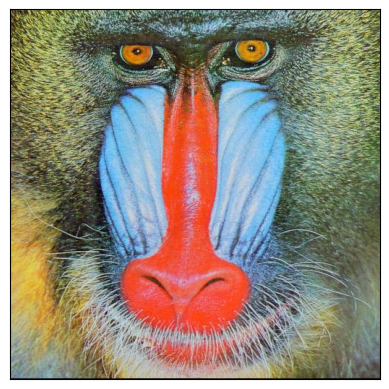

In [47]:
import cv2
from matplotlib import pyplot as plt
import os
import wget

if not os.path.exists("mandril.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/01_Intro/mandril.jpg


I = cv2.imread("mandril.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.xticks([])
plt.yticks([])
plt.show()


W praktycznych rozważaniach często analizuje się obrazy w odcieniach szarości (ang. *grayscale*).
Do konwersji służy znana już funkcja `cvtColor` tylko tym razem z parametrem `cv2.COLOR_RGB2GRAY`.
Proszę spróbować wyświetlić obraz.
Może okazać się, że nadal jest kolorowy, choć inaczej.
Dlaczego tak się dzieje zostanie obszerniej wyjaśnione pod koniec ćwiczenia.
Na razie należy dodać polecenie `plt.gray()` przed `plt.show`.


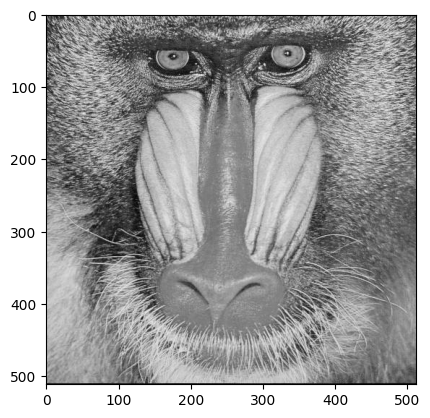

In [48]:
IG = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.imshow(IG)
plt.gray()
plt.show()


Czasami konieczne jest zapisanie przetworzonego obrazu.
Służy do tego funkcja `cv2.imwrite`.
Proszę zapisać szarą wersję mandryla w formacie *png*.
Warto sprawdzić, czy obraz zapisał się poprawnie tj. otworzyć go w aplikacji do przeglądania obrazów.

In [49]:
cv2.imwrite('gray_mandril.png', IG)

True

Obraz w skali szarości możemy traktować jako dwuwymiarową funkcję $L(x,y)$, gdzie $x$, $y$ to współrzędne piksela, a $L(x,y)$ poziom jasności (najczęściej [0;255] - zapis na 8-bitach, typ *unsigned int*).
Wyświetl obraz mandryl jako funkcję dwuwymiarową (uwaga - to chwilę się liczy):


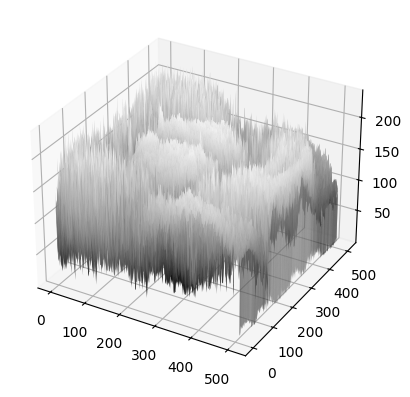

In [50]:
import numpy as np

# create grid
xx, yy = np.mgrid[0:IG.shape[0], 0:IG.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx, yy, IG ,rstride=1, cstride=1, cmap=plt.get_cmap('gray'),
        linewidth=0)

# show it
plt.show()

Komentarz:
- używamy biblioteki do obliczeń *numpy*,
- tworzymy siatkę punktów o rozmiarach takich jak obraz (*shape*),
- rysujemy wykres 3D


Podczas przetwarzania i analizy obrazów przydatne bywają "przekroje" przez obraz, czyli wartości funkcji $L(x,y)$ w przypadku gdy $x$ lub $y$ jest ustalone.
Wykonaj jeden wybrany przekrój w $x$ i $y$:
- po pierwsze należy pobrać dany wiersz lub kolumnę - np. `S = IG[10,:]` (tu jedenasty wiersz),
- po drugie stworzyć wykres złożony z dwóch subwykresów: `f, (ax1,ax2) = plt.subplots(1,2)`
- dla każdego z nich ustawić tytuł (np. `ax1.set_title('XXX')`) oraz treść `ax1.plot(S)`,
- na koniec całość wyświetlić `plt.show()`.






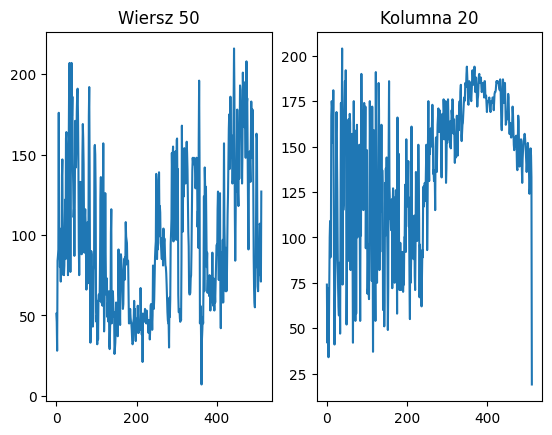

In [51]:
R = IG[50,:]
C = IG[:,20]
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Wiersz 50')
ax1.plot(R)
ax2.set_title('Kolumna 20')
ax2.plot(C)
plt.show()


Obrazy indeksowane składają się z dwóch macierzy - obrazu oraz tzw. mapy kolorów. 
W macierzy obrazu zapisane są wartości poszczególnych pikseli. 
Macierz mapy kolorów ma rozmiar $m \times 3$ ($m$ wierszy, w~każdym 3 wartości - składowe R,G,B).
Podczas wyświetlania, na podstawie wartości piksela, odczytywany jest kolor z macierzy mapy kolorów.
W ten sposób możliwe staje się "pokolorowanie" obrazu w skali szarości (stąd wcześniej szary mandryl był kolorowy).
Wykorzystanie pseudokoloru nie wpływa na ilość informacji zawartej na obrazku, pomaga jedynie przedstawić go w bardziej czytelnej (dla człowieka) formie.
Przykładowo można uzyskać poprawę kontrastu, co jest ważne przy analizie np. obrazów medycznych.
Bardziej obszerny opis i spis dostępnym map można znaleźć w [dokumentacji.](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

Wykorzystując dokumentację oraz polecenie `plt.imshow(IG, cmap=plt.get_cmap('XXX'))` proszę wyświetlić obraz madryl w 4 różnych mapach kolorów.


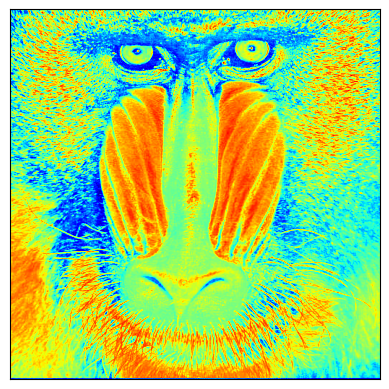

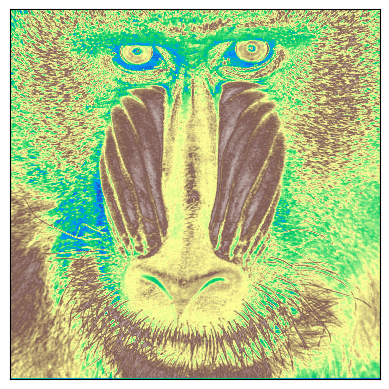

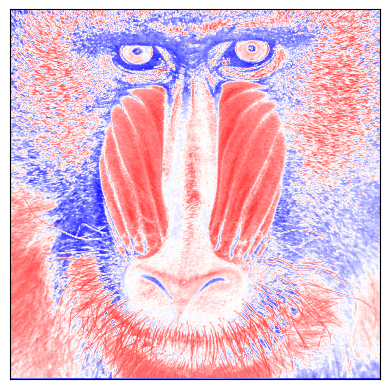

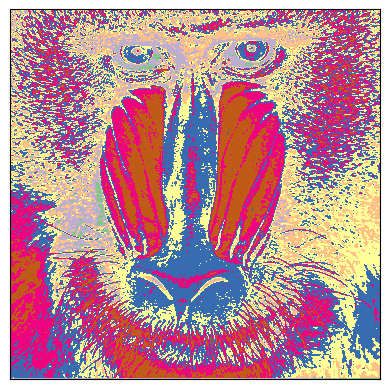

In [52]:

plt.imshow(IG, cmap=plt.get_cmap('jet'))
plt.xticks([])
plt.yticks([])
plt.show()
plt.gray()

plt.imshow(IG, cmap=plt.get_cmap('terrain'))
plt.xticks([])
plt.yticks([])
plt.show()
plt.gray()

plt.imshow(IG, cmap=plt.get_cmap('bwr'))
plt.xticks([])
plt.yticks([])
plt.show()
plt.gray()

plt.imshow(IG, cmap=plt.get_cmap('Accent'))
plt.xticks([])
plt.yticks([])
plt.show()